# 虚谷物联之数据采集

## 范例说明

1.功能描述：利用虚谷号和光线传感器模块，制作一个简单的物联网作品原型，实现数据采集，并且可以和手机交互；

2.涉及材料：

    1）硬件：虚谷号、Arduino扩展板、光线传感器
    2）软件：siot服务器，siot库（Python），xugu库（Python）
3.文档写作：谢作如、元银萍

4.参考网站：https://github.com/vvlink/SIoT

5.其他说明：本作品范例可以移植到其他平台。因为虚谷号已经默认安装了siot库，也预装了siot服务器，使用虚谷号的用户可以省略这一步。

## 代码编写

第一步：导入库

In [ ]:
import siot
import time

siot库是对mqtt库对二次封装，让代码更加简洁。

In [ ]:
from xugu import Pin

In [ ]:
SERVER = "127.0.0.1"        #MQTT服务器IP
CLIENT_ID = ""              #在SIoT上，CLIENT_ID可以留空
IOT_pubTopic  = 'xzr/001'   #“topic”为“项目名称/设备名称”
IOT_UserName ='scope'        #用户名
IOT_PassWord ='scope'     #密码

说明：虚谷号可以用127.0.0.1表示本机，用户名和密码统一使用“scope”，topicid自己定义，这里用的是“xzr/001”，表示项目名称为“xzr”，设备名称为“001”。

In [ ]:
siot.init(CLIENT_ID, SERVER, user=IOT_UserName, password=IOT_PassWord)
siot.connect()

In [ ]:
p1 = Pin("A0", Pin.ANALOG) # 初始化 A0 引脚,设置为输入模式

请将光线传感器通过arduino扩展板（通用），接到虚谷号板载Arduino的**“A0”**口。

In [ ]:
while True:
  value = p1.read_analog()
  print(value)
  siot.publish(IOT_pubTopic,"%d"%value)
  time.sleep(1)

访问虚谷号的siot服务，输入用户名密码（分别为scope），在主题“xzr/001”中，可看到虚谷号发送的光线数据，如图所示。
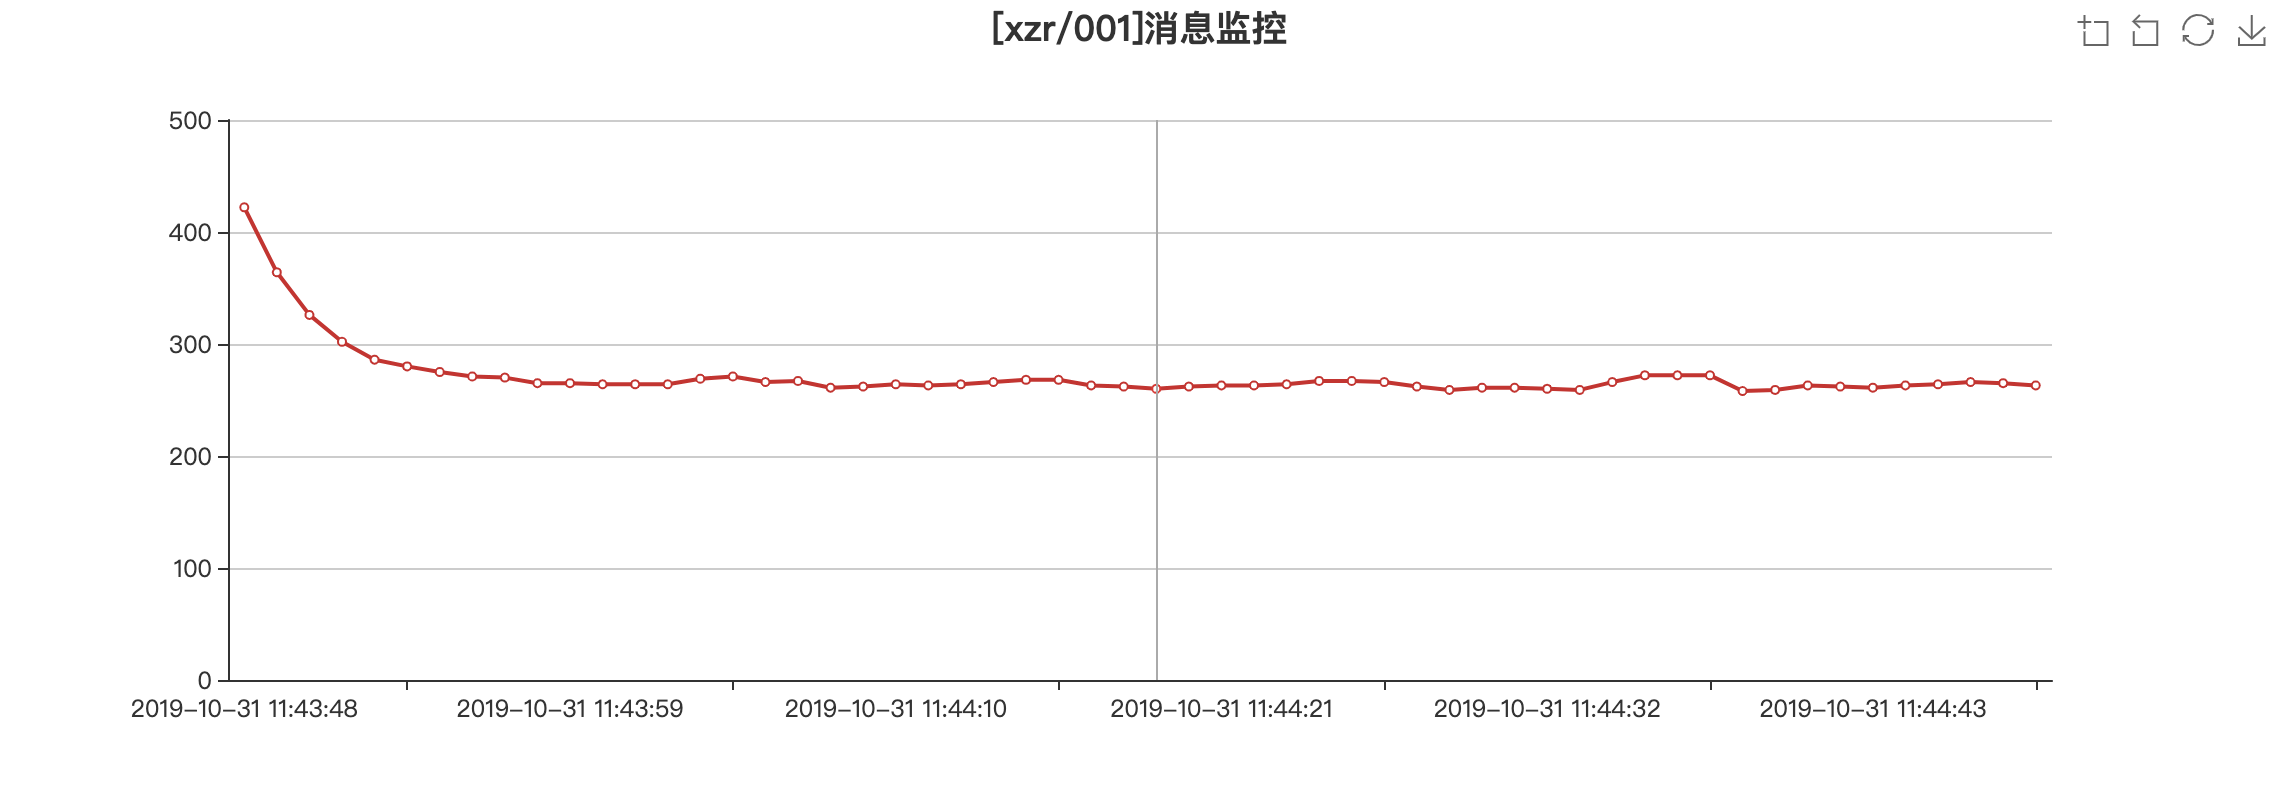

注：使用“中断服务”按钮（上方的黑色正方形），可以停止程序运行。